In [63]:
import numpy as np
import pandas as pd
from datetime import datetime,date

%matplotlib inline

df = pd.read_csv('./data/btc-usd-max.csv',index_col=0,parse_dates=True)
# remove the time from the date time index
df.index = pd.to_datetime(df.index.date)

df.head()

,price,market_cap,total_volume
2013-04-28,135.30,1.500518e+09,0.0
2013-04-29,141.96,1.575032e+09,0.0
2013-04-30,135.30,1.501657e+09,0.0
2013-05-01,117.00,1.298952e+09,0.0
2013-05-02,103.43,1.148668e+09,0.0


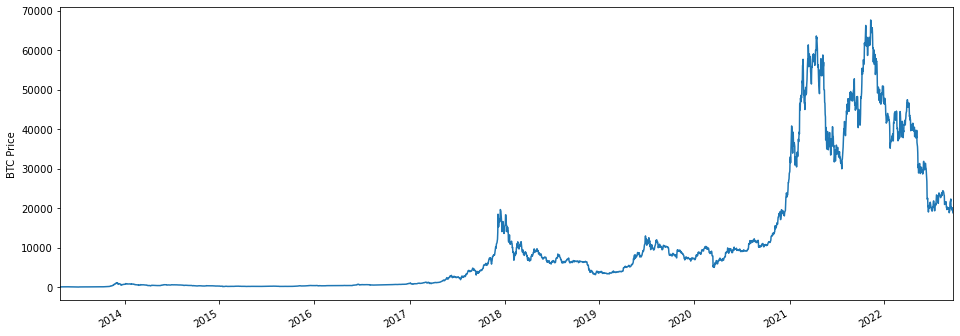

In [64]:
# Plots of the data
ax = df['price'].plot(figsize=(16,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='BTC Price');

In [85]:
# HP_Hodrick_Prescott_filter is used in aggregated data so monthly, quarterly etc to find trend and cycles
# here I will try to aggregate the data first in months, then in quarters then in years and finally 4 years
# will resample in 2 ways. first by the mean and then by the closing of the period
df2 = df[['price','market_cap']].resample('M').mean()

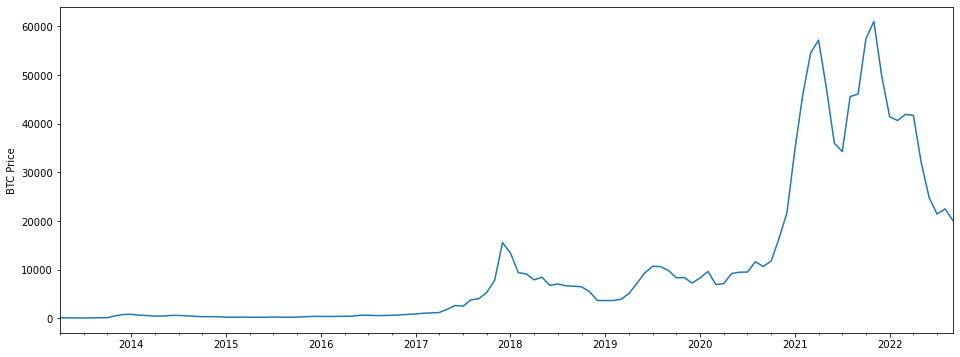

In [86]:
# first i will start with monthly and by the mean
ax = df2['price'].plot(figsize=(16,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='BTC Price');

In [87]:
# The Hodrick-Prescott smoothing parameter. A value of 1600 is suggested for quarterly data. 
# Ravn and Uhlig suggest using a value of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly data.


from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
btc_Monthly_cycle, btc_Monthly_trend = hpfilter(df2['price'], lamb=129600)
df2['btc_Monthly_cycle'] = btc_Monthly_cycle
df2['btc_Monthly_trend'] = btc_Monthly_trend

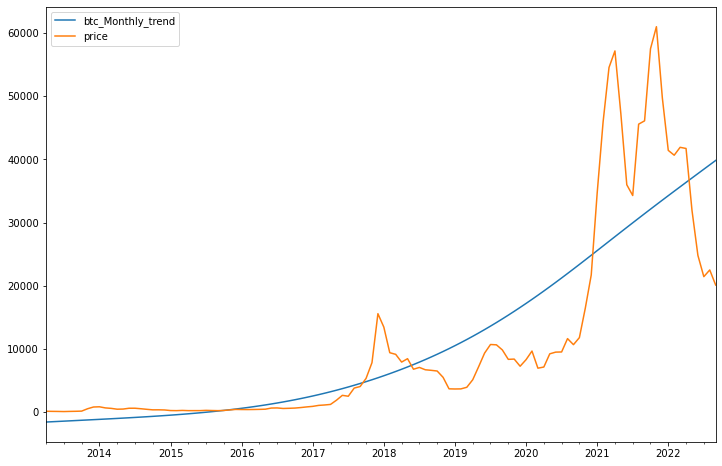

In [92]:
df2[['btc_Monthly_trend','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

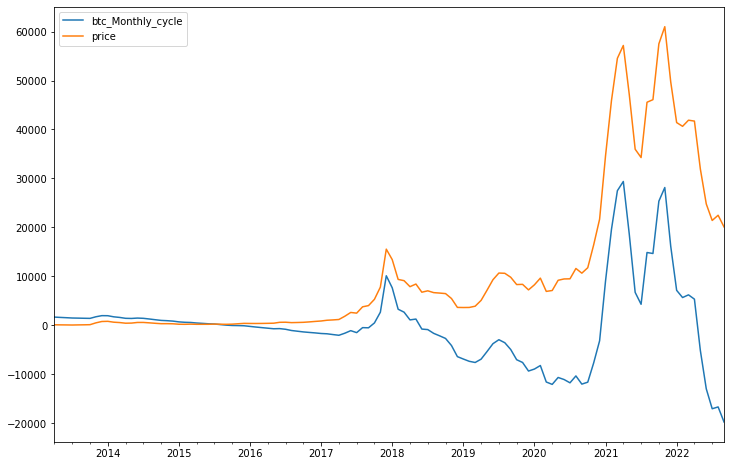

In [93]:
df2[['btc_Monthly_cycle','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

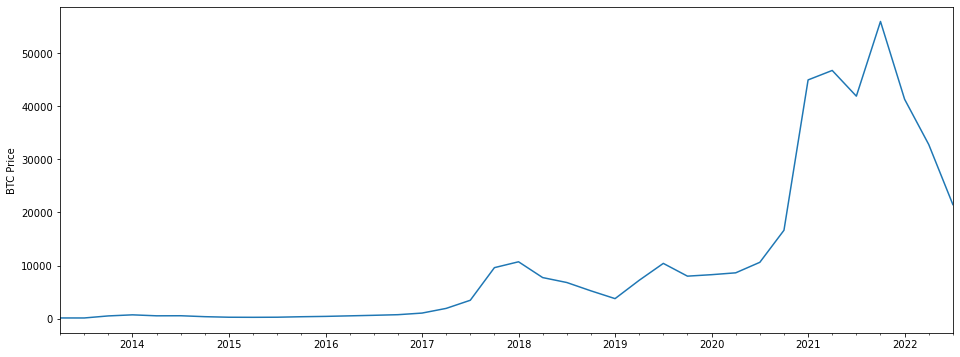

In [95]:
# Now I will do everything again in quarters with mean value

df2 = df[['price','market_cap']].resample('Q').mean()
ax = df2['price'].plot(figsize=(16,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='BTC Price');

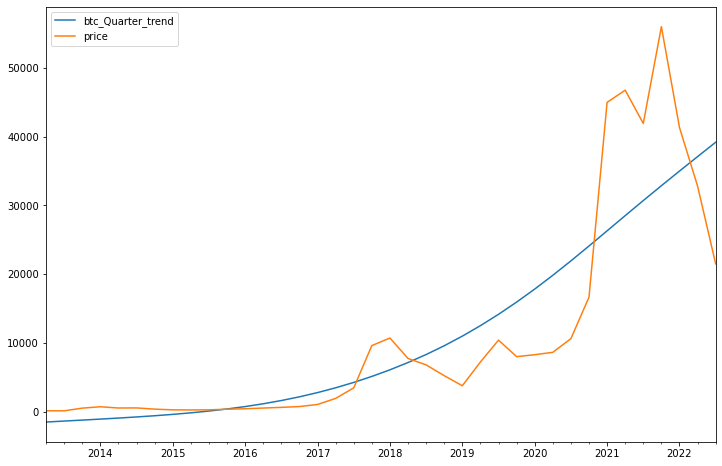

In [96]:
btc_Quarter_cycle, btc_Quarter_trend = hpfilter(df2['price'], lamb=1600)
df2['btc_Quarter_cycle'] = btc_Quarter_cycle
df2['btc_Quarter_trend'] = btc_Quarter_trend
df2[['btc_Quarter_trend','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

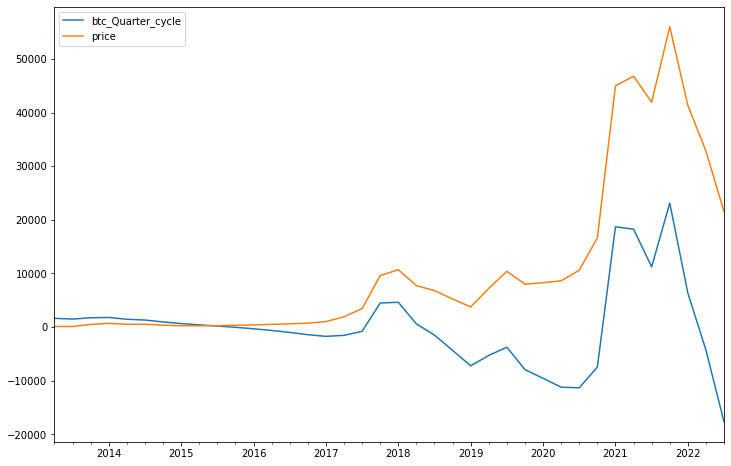

In [97]:
df2[['btc_Quarter_cycle','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

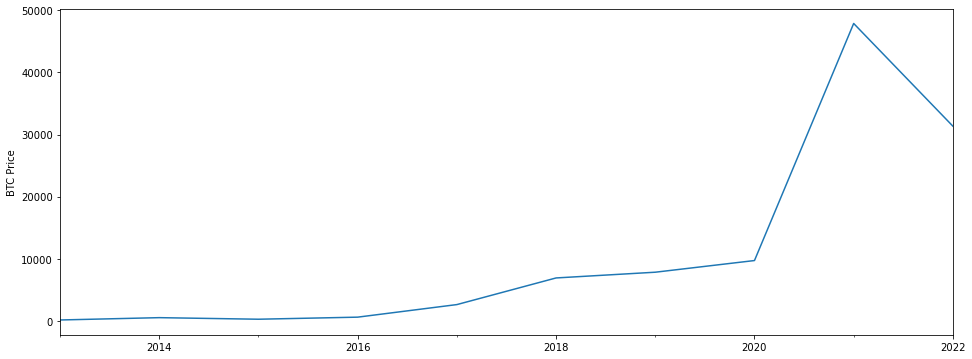

In [99]:
# Now I will do everything again in years with median value

df2 = df[['price','market_cap']].resample('Y').median()
ax = df2['price'].plot(figsize=(16,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='BTC Price');

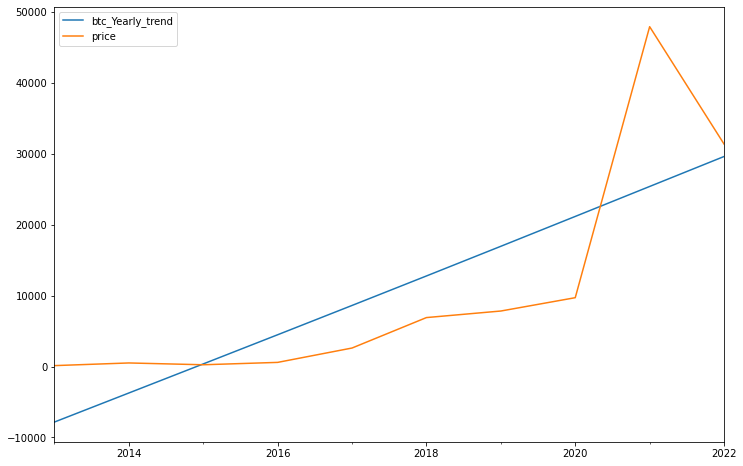

In [100]:
btc_Yearly_cycle, btc_Yearly_trend = hpfilter(df2['price'], lamb=1600)
df2['btc_Yearly_cycle'] = btc_Yearly_cycle
df2['btc_Yearly_trend'] = btc_Yearly_trend
df2[['btc_Yearly_trend','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

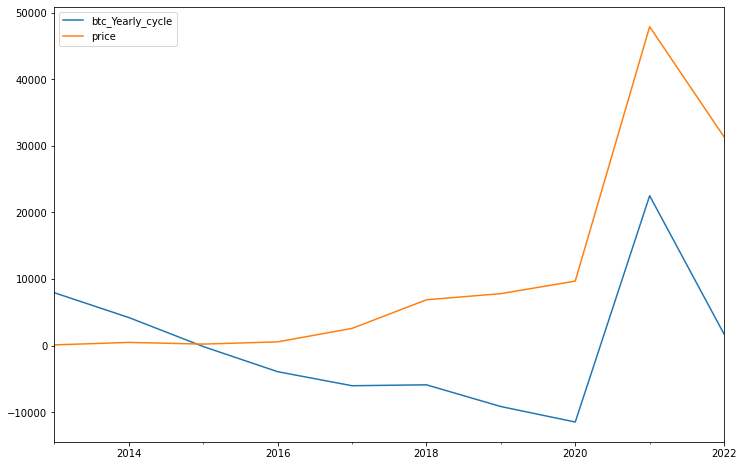

In [101]:
df2[['btc_Yearly_cycle','price']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);